# Pre-Processing Techniques

## Imports

In [151]:
# CONSTANT Variables
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']

fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['AB42', 'AB40']

display1 = ['PLASMA_NFL', 'PLASMATAU', 'AB4240'] # These should be the biomarker values
display2 = ['ABETA', 'PTAU', 'TAU'] # Should be the CSF Values
display3 = ['MMSE', 'AGE', 'PTEDUCAT'] # This should be the Non-Blood values, such as MMSE etc.

output_file_path = "File1/"

# Pre-Split Training and Testing (Ensure Dist. of classes)

In [152]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [153]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
577,1414,bl,18.7,1.45,0.130205
578,1419,bl,25.8,1.56,0.194001
579,1423,bl,35.3,2.77,0.171963
580,1430,bl,69.0,2.54,NaN


In [154]:
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'AGE', 'PTEDUCAT', 'PTAU', 'TAU', 'PTGENDER', 'ABETA'])
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingFiles\PreProcessingPy.py:58: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,CN,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,Male,NaN
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,81.3,18,22.83,239.7,Male,741.5
2,4,bl,MCI,31.2,3.76,0.311458,27.0,67.5,10,13.29,153.1,Male,1501
3,5,bl,CN,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,Male,547.3
4,6,bl,MCI,52.5,2.86,0.153287,25.0,80.4,13,NaN,NaN,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,1414,bl,MCI,18.7,1.45,0.130205,27.0,74.3,18,18.62,213.7,Male,1308
577,1419,bl,MCI,25.8,1.56,0.194001,28.0,77.9,17,22.48,234.9,Male,390.5
578,1423,bl,MCI,35.3,2.77,0.171963,29.0,69.4,19,40.39,360.9,Male,561
579,1430,bl,Dementia,69.0,2.54,NaN,21.0,83.4,12,NaN,NaN,Female,NaN


## Rename Fields

In [155]:
# Rename to be more intuitive for rest of detection, Also remove non-numeric characters
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,SCD,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,0,NaN
1,3,bl,AD,188.3,3.84,0.220661,20.0,81.3,18,22.83,239.7,0,741.5
2,4,bl,MCI,31.2,3.76,0.311458,27.0,67.5,10,13.29,153.1,0,1501
3,5,bl,SCD,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,0,547.3
4,6,bl,MCI,52.5,2.86,0.153287,25.0,80.4,13,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,1414,bl,MCI,18.7,1.45,0.130205,27.0,74.3,18,18.62,213.7,0,1308
577,1419,bl,MCI,25.8,1.56,0.194001,28.0,77.9,17,22.48,234.9,0,390.5
578,1423,bl,MCI,35.3,2.77,0.171963,29.0,69.4,19,40.39,360.9,0,561
579,1430,bl,AD,69.0,2.54,NaN,21.0,83.4,12,NaN,NaN,1,NaN


## Plot the data

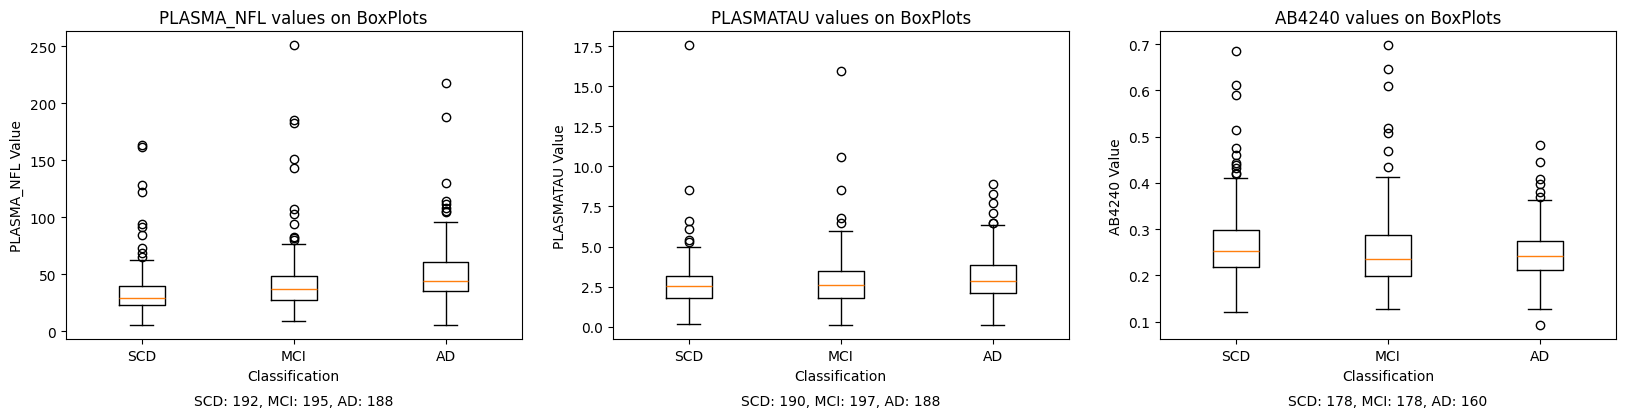

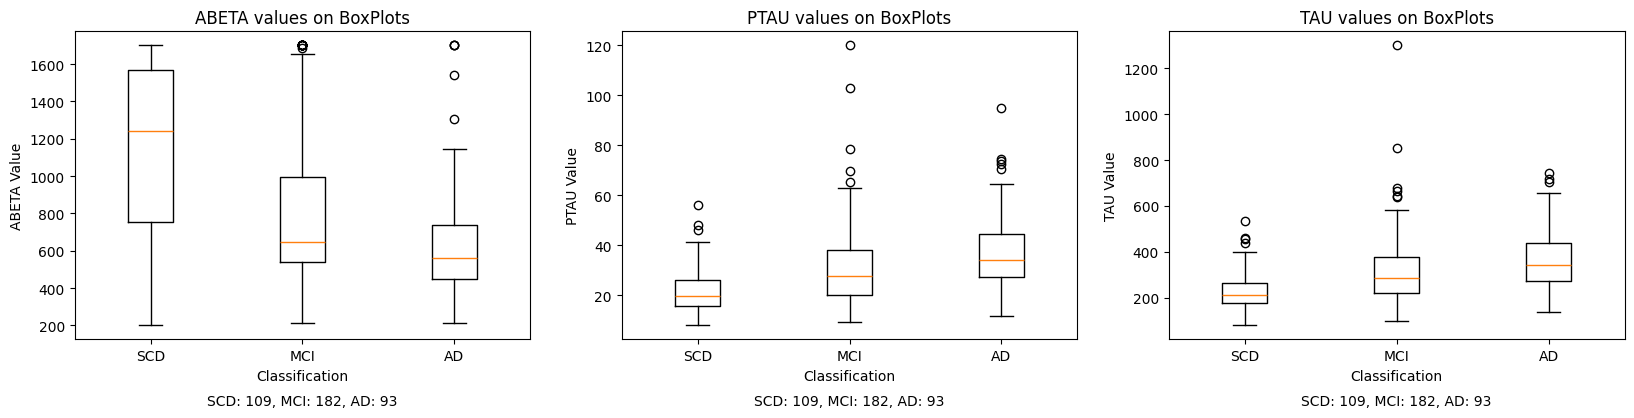

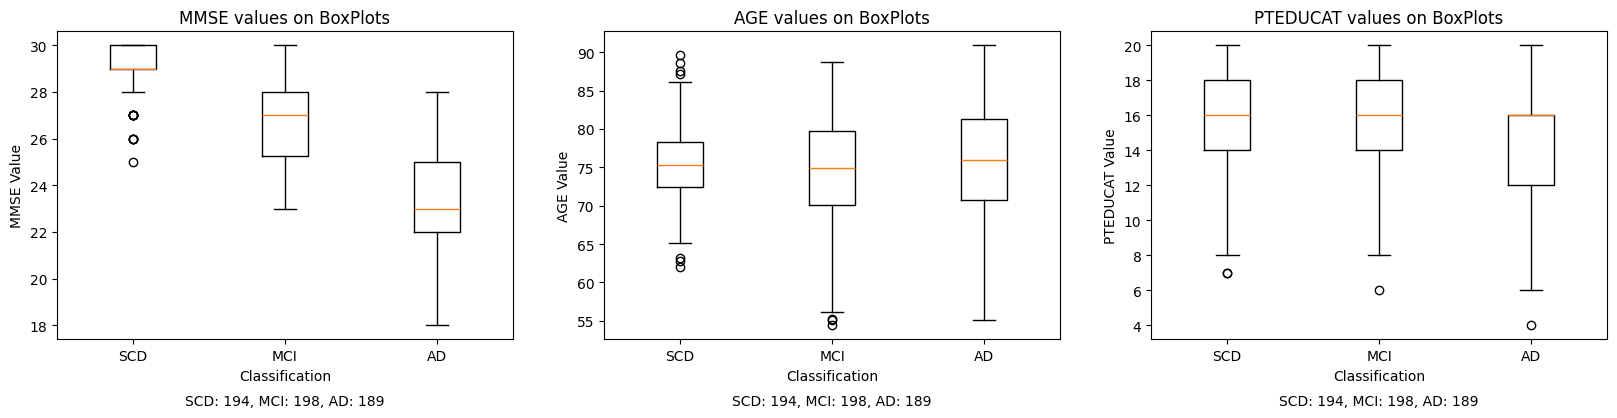

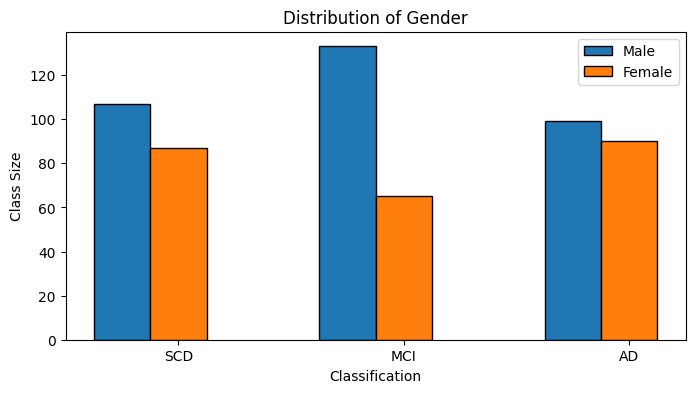

In [156]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)
vd.display(display2)
vd.display(display3)
vd.display_gender()

In [157]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [158]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)
preprocessor.remove_outliers(display2)
preprocessor.remove_outliers(display3)

preprocessor.df

[261, 6, 9, 399, 401, 274, 404, 21, 33, 171, 43, 307, 309, 54, 438, 311, 57, 192, 193, 196, 79, 213, 96, 227, 103, 123]
[483, 547, 112, 433, 146]
[248, 99, 388, 232, 41, 203, 44, 14, 303, 241, 341, 310, 120, 188, 61]


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,SCD,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,0,NaN
3,5,bl,SCD,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,0,547.3
8,14,bl,SCD,39.3,4.51,0.205351,29.0,78.5,12,16.68,203.6,1,1582
10,16,bl,SCD,23.6,4.57,0.398098,28.0,65.4,9,15.88,170.5,0,550.6
11,19,bl,SCD,25.0,2.57,0.410816,29.0,73.1,18,18.05,213.7,1,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,1391,bl,AD,49.8,1.40,NaN,26.0,85.1,12,NaN,NaN,0,NaN
574,1402,bl,AD,94.1,4.45,0.260446,23.0,69.3,20,64.37,575,0,392.5
575,1409,bl,AD,46.4,3.54,0.231390,21.0,65.9,15,NaN,NaN,0,NaN
579,1430,bl,AD,69.0,2.54,NaN,21.0,83.4,12,NaN,NaN,1,NaN


### Display the Filtered Data

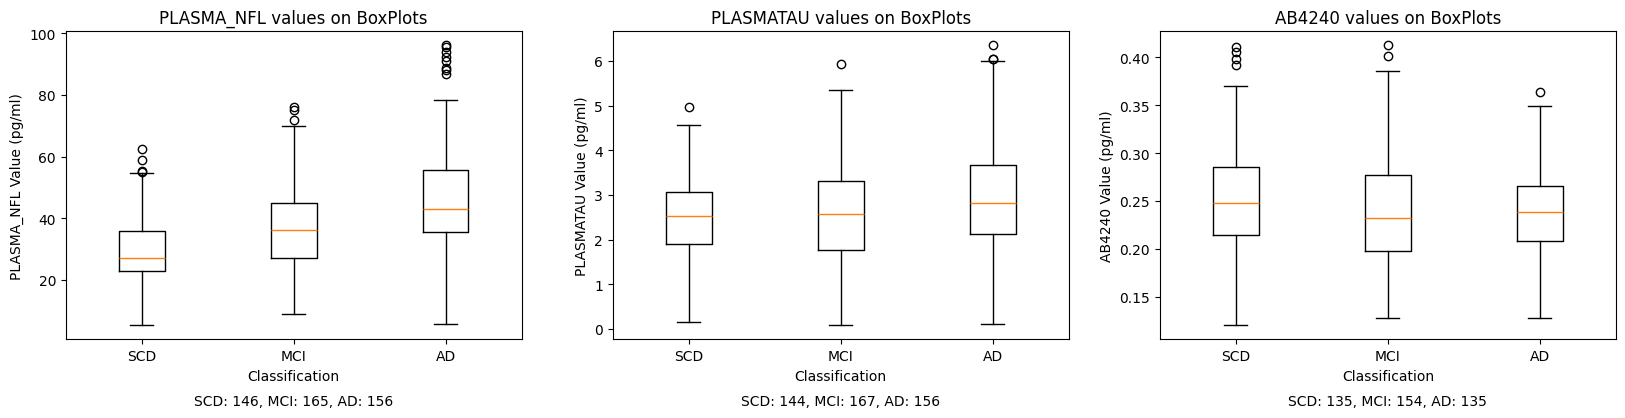

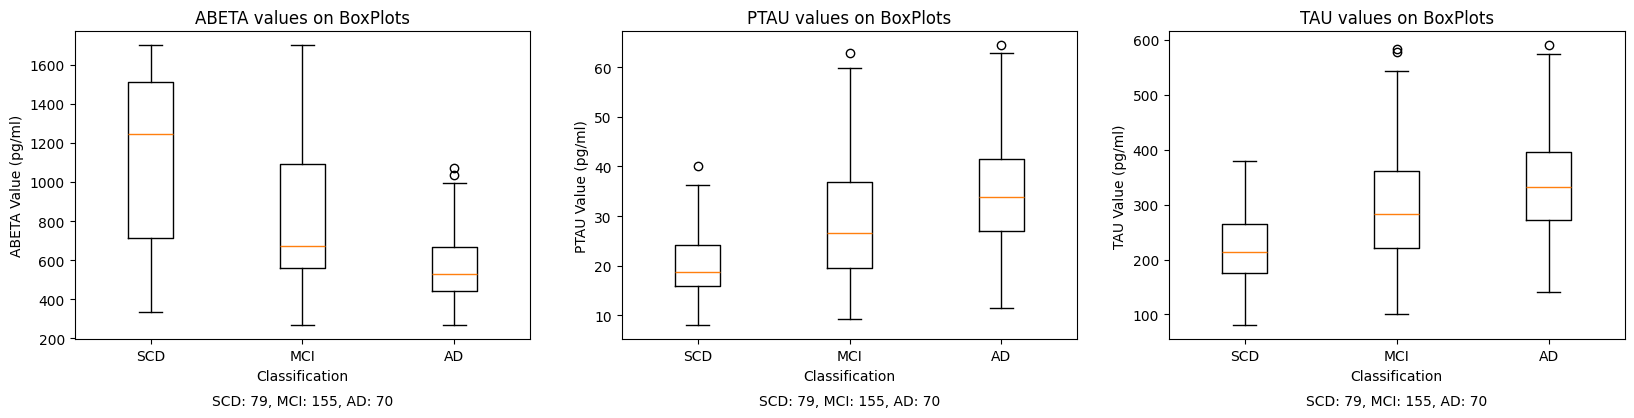

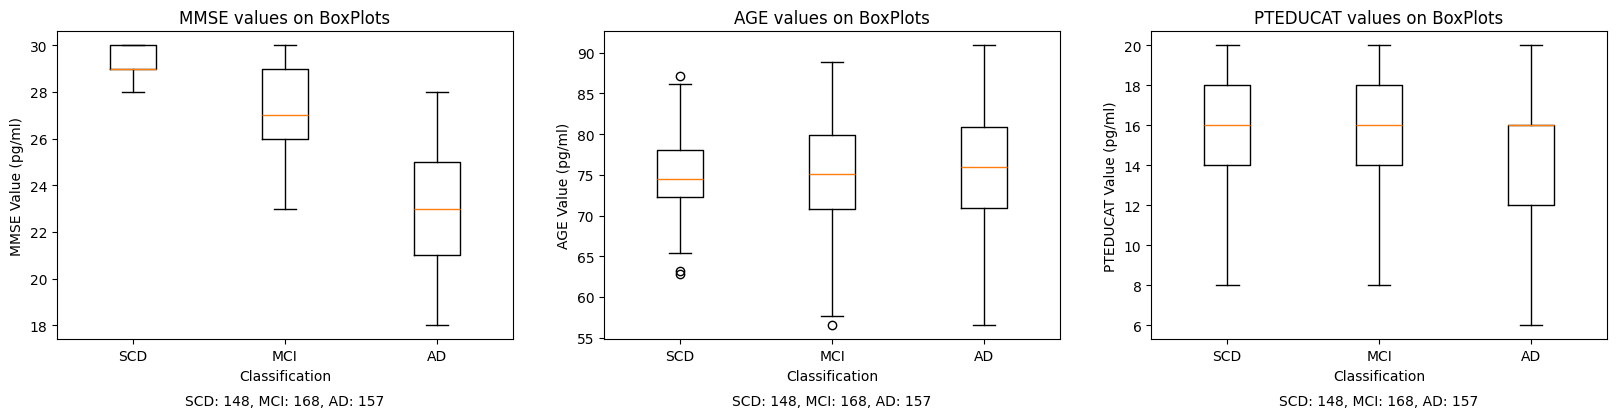

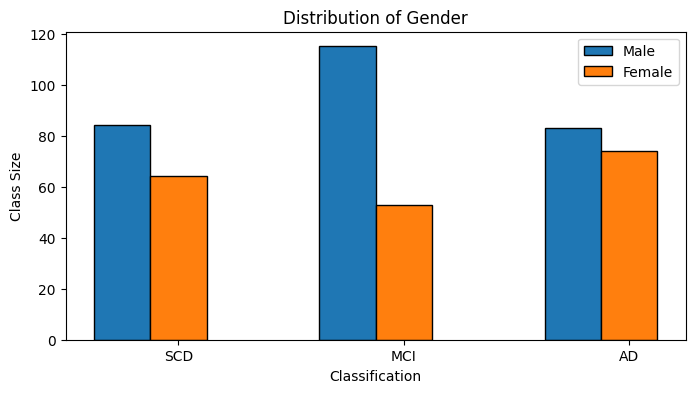

In [162]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)
vd.display(display3)
vd.display_gender()

In [160]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

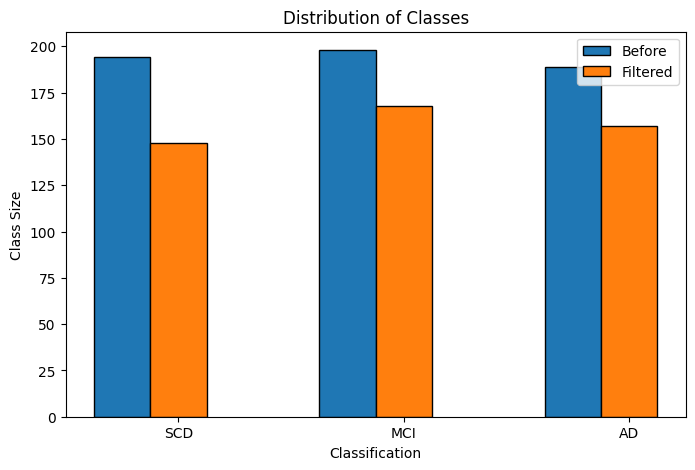

In [161]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File1")
display.display_results()